In [6]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as oy
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import os

#### List of Dataset Included.

In [7]:
os.listdir('./data/')

['education_expenditure_supplementary_data.csv',
 'school_and_country_table.csv',
 'cwurData.csv',
 'educational_attainment_supplementary_data.csv',
 'archive.zip',
 'shanghaiData.csv',
 'timesData.csv']

#### TimesData

In [8]:
timesData = pd.read_csv('./data/timesData.csv')
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [9]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [10]:
import plotly.graph_objs as go

#### Lineplot

In [12]:
df = timesData.iloc[:100, :]

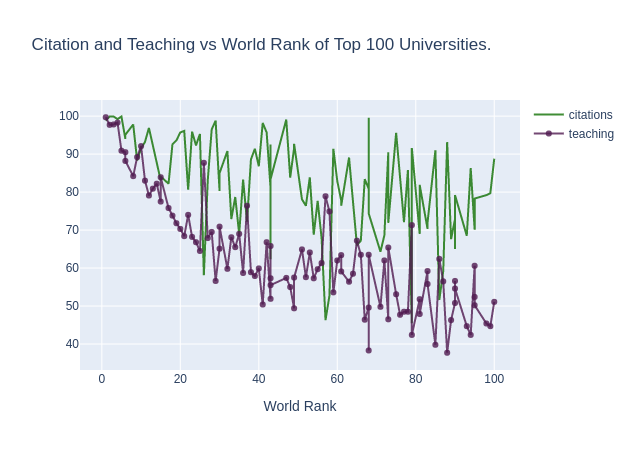

In [14]:
## Trace 1
trace1 = go.Scatter(
    x = df.world_rank,
    y = df.citations,
    mode = 'lines',
    name = 'citations',
    marker = dict(color = 'rgba(16,112,2,0.8)'),
    text = df.university_name
)

## Trace 2
trace2 = go.Scatter(
    x = df.world_rank,
    y = df.teaching,
    mode = 'lines+markers',
    name = 'teaching',
    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
    text = df.university_name
)

data = [trace1, trace2]
layout = dict(
    title = 'Citation and Teaching vs World Rank of Top 100 Universities.',
    xaxis=dict(title='World Rank', ticklen=5, zeroline=False)
)

fig = dict(data = data, layout = layout)
iplot(fig)

#### For year 2014, 2015, 2016

In [15]:
df2014 = timesData[timesData["year"] == 2014].iloc[:100, :]
df2015 = timesData[timesData["year"] == 2015].iloc[:100, :]
df2016 = timesData[timesData["year"] == 2016].iloc[:100, :]

#### Scatter Plot

In [16]:
import plotly.graph_objects as go

In [18]:
trace1 = go.Scatter(
    x = df2014.world_rank,
    y = df2014.citations,
    mode = "markers",
    name = "2014",
    marker = { "color" : "rgba(255, 128, 255, 0.8)"},
    text = df2014.university_name
)

trace2 = go.Scatter(
    x = df2015.world_rank,
    y = df2015.citations,
    mode = "markers",
    name = "2015",
    marker = { "color" : "rgba(128, 255, 255, 0.8)"},
    text = df2015.university_name
)

trace3 = go.Scatter(
    x = df2016.world_rank,
    y = df2016.citations,
    mode = "markers",
    name = "2016",
    marker = { "color" : "rgba(255, 255, 128, 0.8)"},
    text = df2016.university_name
)

In [19]:
data = [trace1 , trace2, trace3]

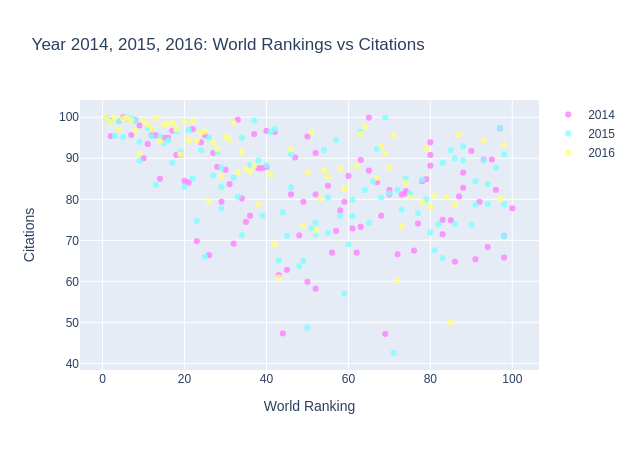

In [21]:
layout = {
    "title": "Year 2014, 2015, 2016: World Rankings vs Citations",
    "xaxis": {
        "title": "World Ranking",
        "ticklen": 5,
        "zeroline": False
    },
    "yaxis": {
        "title": "Citations",
        "ticklen": 5,
        "zeroline": False
    }
}
fig = dict(data = data, layout = layout)
iplot(fig)

#### Bar Plot

In [150]:
df2014 = timesData[timesData['year'] == 2014].iloc[:3, :]

In [151]:
trace1 = go.Bar(
    x = df2014.university_name,
    y = df2014.citations,
    name = "Citations",
    marker = {
        "color": "rgba(255, 174, 255, 0.5)",
        "line" : {
            "color" : "rgba(0,0,0)",
            "width" : 1.5
        }
    },
    text = df2014.country
)

trace2 = go.Bar(
    x = df2014.university_name,
    y = df2014.teaching,
    name = "Teaching",
    marker = {
        "color" : "rgba(234,235,124, 0.5)",
        "line" : {
            "color" : "rgba(1,1,1)",
            "width" : 1.5
        }
    },
    text = df2014.country
)

In [152]:
data = [trace1, trace2]

In [153]:
## For Relative Plot
layout = {
    "barmode" : "relative"
}

## For Group Plot
# layout = {
#     "barmode" : "group"
# }

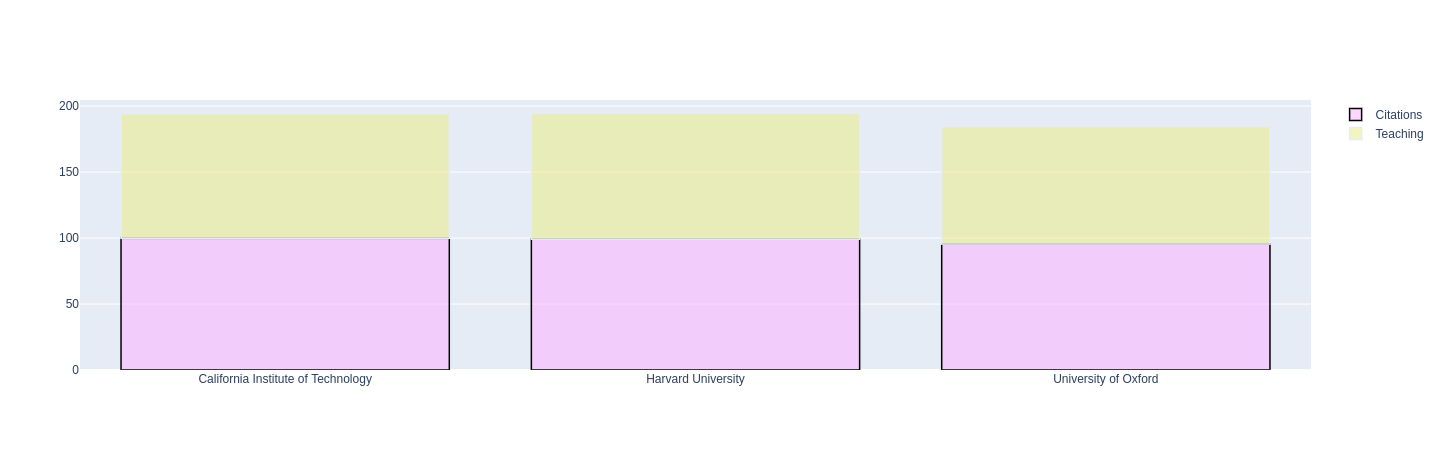

In [155]:
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Horizontal Bar Chart with two types of chart

In [72]:
df2016 = timesData[timesData["year"] == 2016].iloc[:7, :]

In [73]:
y_saving = [each for each in df2016.research]
x_saving = [each for each in df2016.university_name]

In [74]:
x_net_worth = [each for each in df2016.university_name]
y_net_worth = [float(each) for each in df2016.income]

In [149]:
trace1 = go.Bar(
    x = x_saving,
    y = y_saving,
    marker = {
        "color" : "rgba(153,31,135,0.6)",
        "line" : {
            "color" : "rgba(132,214,36,1.0)",
            "width" : 10,
        } 
    },
    name = "reseach",
    orientation = 'h'
)

trace2 = go.Scatter(
    x = x_net_worth,
    y = y_net_worth,
    mode = "lines+markers",
    line = {
        "color" : "rgba(141,42,64)"
    },
    name = "income"
)

In [138]:
layout = {
    "title" : "Citations and income.",
    "xaxis": {
        "zeroline" : False,
        "showticklabels" : False,
        "showline" : True,
        "showgrid": True,
        "domain" : [0, 0.2]
    },
    "yaxis" : {
        "showticklabels" : True,
        "domain" : [0, 0.85]
    },
    "xaxis2" : {
        "zeroline": False,
        "showline": False,
        "showticklabels": True,
        "showgrid" :True,
        "domain" : [0.2, 1],
        "side" : "top",
        "dtick" : 25
    },
    "yaxis2":{
        "showline" : True,
        "showticklabels": False,
        "linecolor" : "rgba(102,102,102,0.8)",
        "linewidth" : 2,
        "domain": [0, 0.85]
    },
    "legend" : {
#         "x" : 0.029,
#         "y" : 1.038,
        "font" : {
            "size" : 10
        }
    },
#     "margin": {
#         "l" : 200,
#         "r" : 20,
#         "t" : 70,
#         "b" : 70
#     },
    "paper_bgcolor" : "rgb(248,248,255)",
    "plot_bgcolor" : "rgb(248,248,255)"
    
}

In [139]:
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)

In [140]:
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    annotations.append({
        "xref" : "x2",
        "yref" : "y2",
        "y" : xd,
        "x" : ydn - 4,
        "text" : "{:,}".format(ydn),
        "font" : {
            "family": "Arial",
            "size" : 12,
            "color" : "rgb(63, 72, 204)"
        },
        "showarrow":False
    })
    
    annotations.append({
        "xref" : "x1",
        "yref" : "y1",
        "y" : xd,
        "x" : yd + 3,
        "text" : "{}".format(yd),
        "font" : {
            "family": "Arial",
            "size" : 12,
            "color" : "rgb(153, 152, 135)"
        },
        "showarrow":False
    })
    

In [141]:
layout['annotations'] = annotations

In [142]:
from plotly import tools

In [143]:
fig = tools.make_subplots(
    rows = 1,
    cols = 2,
    specs = [[{}, {}]],
    shared_xaxes = True,
    shared_yaxes = False,
    vertical_spacing=0.001
)

In [144]:
fig.append_trace(trace1, 1 ,1)

In [145]:
fig.append_trace(trace2, 1, 2)

In [146]:
fig["layout"].update(layout)

Layout({
    'annotations': [{'font': {'color': 'rgb(63, 72, 204)', 'family': 'Arial', 'size': 12},
                     'showarrow': False,
                     'text': '98.0',
                     'x': 94.0,
                     'xref': 'x2',
                     'y': 'California Institute of Technology',
                     'yref': 'y2'},
                    {'font': {'color': 'rgb(153, 152, 135)', 'family': 'Arial', 'size': 12},
                     'showarrow': False,
                     'text': '97.6',
                     'x': 100.6,
                     'xref': 'x',
                     'y': 'California Institute of Technology',
                     'yref': 'y'},
                    {'font': {'color': 'rgb(63, 72, 204)', 'family': 'Arial', 'size': 12},
                     'showarrow': False,
                     'text': '73.0',
                     'x': 69.0,
                     'xref': 'x2',
                     'y': 'University of Oxford',
                     'yref': 'y2

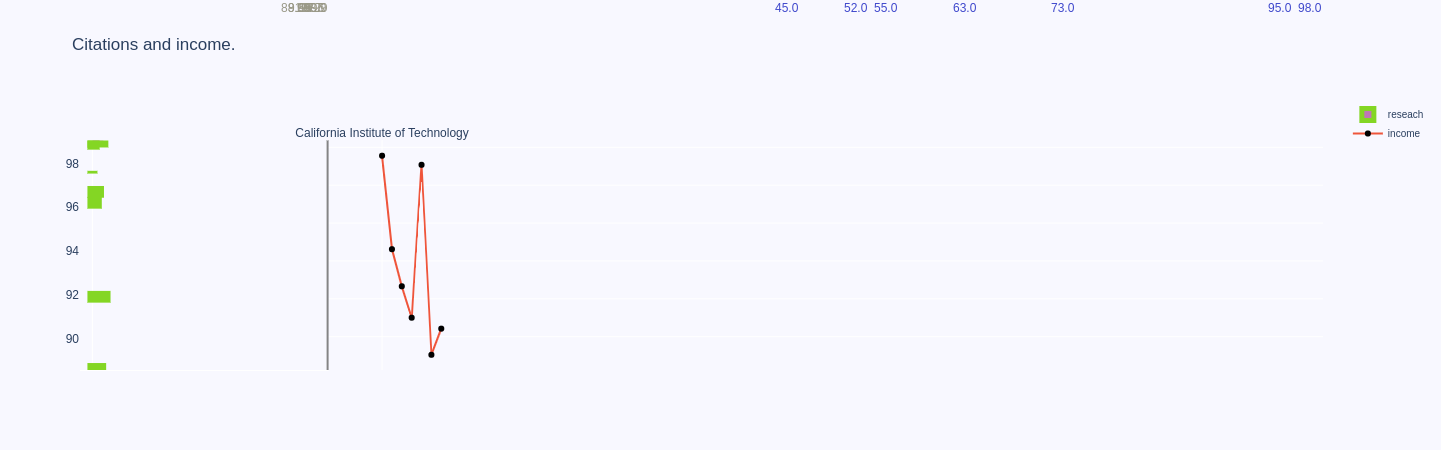

In [147]:
iplot(fig)